In [29]:
# Import libraries
import sqlite3       # To create database
import pandas as pd  # To handle data tables
import matplotlib.pyplot as plt  # To draw graphs
from sklearn.preprocessing import LabelEncoder  # Convert words to numbers
from sklearn.model_selection import train_test_split  # Split data into train/test
from sklearn.ensemble import RandomForestClassifier  # Machine learning model
from sklearn.metrics import accuracy_score  # To check accuracy


In [36]:
# Create database in Google Colab
import os

# Close existing connection if it exists and is open
if 'conn' in globals() and conn is not None:
    try:
        conn.close()
    except Exception as e:
        print(f"Error closing existing connection: {e}")

# Delete the database file if it exists to ensure a clean slate
if os.path.exists("fraud.db"):
    os.remove("fraud.db")

conn = sqlite3.connect("fraud.db")  # Create a database file
cursor = conn.cursor()               # Make a cursor to run SQL

# Create transactions table
cursor.execute("""
CREATE TABLE transactions (
    transaction_id INTEGER PRIMARY KEY,
    user_id INTEGER,
    amount INTEGER,
    city TEXT,
    payment_method TEXT,
    transaction_date TEXT
)
""")

# Create fraud_labels table
cursor.execute("""
CREATE TABLE fraud_labels (
    transaction_id INTEGER,
    is_fraud INTEGER
)
""")

conn.commit()  # Save changes

OperationalError: database is locked

In [34]:
# Transactions data
transactions = [
    (1,101,500,'Mumbai','UPI','2024-01-01'),
    (2,101,60000,'Delhi','Card','2024-01-01'),
    (3,102,1200,'Pune','UPI','2024-01-02'),
    (4,103,70000,'Mumbai','Card','2024-01-02'),
    (5,103,80000,'Mumbai','Card','2024-01-02'),
    (6,104,300,'Delhi','UPI','2024-01-03'),
    (7,104,400,'Delhi','UPI','2024-01-03'),
    (8,104,500,'Delhi','UPI','2024-01-03'),
    (9,104,600,'Delhi','UPI','2024-01-03'),
    (10,104,700,'Delhi','UPI','2024-01-03')
]

cursor.executemany("INSERT INTO transactions VALUES (1,3,5,8,10)", transactions)

# Fraud labels
frauds = [
    (1,0),(2,1),(3,0),(4,1),(5,1),
    (6,0),(7,0),(8,0),(9,0),(10,0)
]

cursor.executemany("INSERT INTO fraud_labels VALUES (?,?)", frauds)

conn.commit()


OperationalError: table transactions has 6 columns but 5 values were supplied

In [35]:
# Transactions data
transactions = [
    (1,101,500,'Mumbai','UPI','2024-01-01'),
    (2,101,60000,'Delhi','Card','2024-01-01'),
    (3,102,1200,'Pune','UPI','2024-01-02'),
    (4,103,70000,'Mumbai','Card','2024-01-02'),
    (5,103,80000,'Mumbai','Card','2024-01-02'),
    (6,104,300,'Delhi','UPI','2024-01-03'),
    (7,104,400,'Delhi','UPI','2024-01-03'),
    (8,104,500,'Delhi','UPI','2024-01-03'),
    (9,104,600,'Delhi','UPI','2024-01-03'),
    (10,104,700,'Delhi','UPI','2024-01-03')
]

# Use ? placeholders for each column
cursor.executemany("INSERT INTO transactions VALUES (?,?,?,?,?,?)", transactions)

# Fraud labels
frauds = [
    (1,0),(2,1),(3,0),(4,1),(5,1),
    (6,0),(7,0),(8,0),(9,0),(10,0)
]

cursor.executemany("INSERT INTO fraud_labels VALUES (?,?)", frauds)

# Save changes
conn.commit()


OperationalError: database is locked

Data from database:
   transaction_id  user_id  amount    city payment_method  is_fraud
0               1      101     500  Mumbai            UPI         0
1               2      101   60000   Delhi           Card         1
2               3      102    1200    Pune            UPI         0
3               4      103   70000  Mumbai           Card         1
4               5      103   80000  Mumbai           Card         1
5               6      104     300   Delhi            UPI         0
6               7      104     400   Delhi            UPI         0
7               8      104     500   Delhi            UPI         0
8               9      104     600   Delhi            UPI         0
9              10      104     700   Delhi            UPI         0

Model Accuracy: 1.0


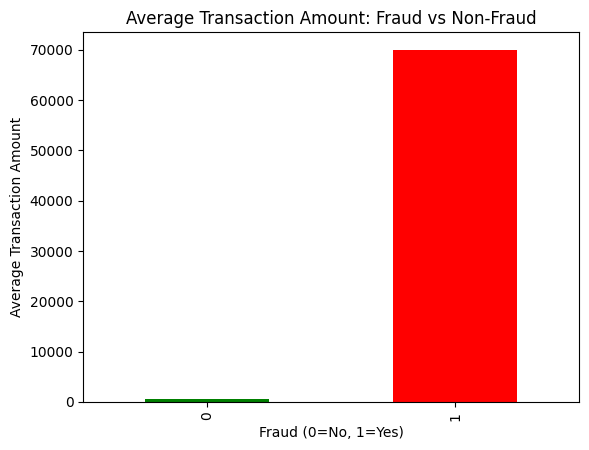

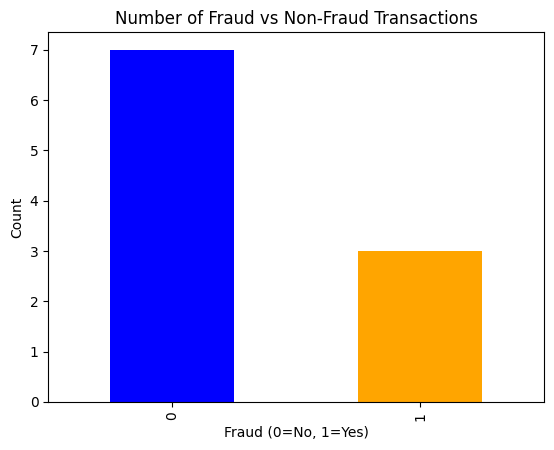

In [38]:
# Step 1: Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import os

# Close existing connection if it exists and is open
if 'conn' in globals() and conn is not None:
    try:
        conn.close()
    except Exception as e:
        print(f"Error closing existing connection: {e}")

# Delete the database file if it exists to ensure a clean slate
if os.path.exists("fraud.db"):
    os.remove("fraud.db")

# Step 2: Create database in Colab
conn = sqlite3.connect("fraud.db")  # database file
cursor = conn.cursor()

# Step 3: Create tables
cursor.execute("""
CREATE TABLE transactions (
    transaction_id INTEGER PRIMARY KEY,
    user_id INTEGER,
    amount INTEGER,
    city TEXT,
    payment_method TEXT,
    transaction_date TEXT
)
""")

cursor.execute("""
CREATE TABLE fraud_labels (
    transaction_id INTEGER,
    is_fraud INTEGER
)
""")

conn.commit()  # save changes

# Step 4: Insert data
transactions = [
    (1,101,500,'Mumbai','UPI','2024-01-01'),
    (2,101,60000,'Delhi','Card','2024-01-01'),
    (3,102,1200,'Pune','UPI','2024-01-02'),
    (4,103,70000,'Mumbai','Card','2024-01-02'),
    (5,103,80000,'Mumbai','Card','2024-01-02'),
    (6,104,300,'Delhi','UPI','2024-01-03'),
    (7,104,400,'Delhi','UPI','2024-01-03'),
    (8,104,500,'Delhi','UPI','2024-01-03'),
    (9,104,600,'Delhi','UPI','2024-01-03'),
    (10,104,700,'Delhi','UPI','2024-01-03')
]

cursor.executemany("INSERT INTO transactions VALUES (?,?,?,?,?,?)", transactions)

frauds = [
    (1,0),(2,1),(3,0),(4,1),(5,1),
    (6,0),(7,0),(8,0),(9,0),(10,0)
]

cursor.executemany("INSERT INTO fraud_labels VALUES (?,?)", frauds)

conn.commit()  # save changes

# Step 5: Load data into pandas
query = """
SELECT t.transaction_id, t.user_id, t.amount, t.city,
       t.payment_method, f.is_fraud
FROM transactions t
JOIN fraud_labels f
ON t.transaction_id = f.transaction_id
"""
df = pd.read_sql(query, conn)
print("Data from database:")
print(df)

# Step 6: Preprocess data (convert text to numbers)
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])
df['payment_method'] = le.fit_transform(df['payment_method'])

X = df[['amount','city','payment_method']]  # features
y = df['is_fraud']                          # target

# Step 7: Split data and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))

# Step 8: Visualization - Average transaction amount
df.groupby('is_fraud')['amount'].mean().plot(kind='bar', color=['green','red'])
plt.xlabel("Fraud (0=No, 1=Yes)")
plt.ylabel("Average Transaction Amount")
plt.title("Average Transaction Amount: Fraud vs Non-Fraud")
plt.show()

# Step 9: Visualization - Number of Fraud vs Non-Fraud
df['is_fraud'].value_counts().plot(kind='bar', color=['blue','orange'])
plt.xlabel("Fraud (0=No, 1=Yes)")
plt.ylabel("Count")
plt.title("Number of Fraud vs Non-Fraud Transactions")
plt.show()